<a href="https://colab.research.google.com/github/OlegV12/GoogleColab/blob/Lesson4/Lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [353]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import seaborn as sns

In [2]:
boston = load_boston()

In [3]:
data = boston['data']
feature_names = boston['feature_names']
X = pd.DataFrame(data, columns=feature_names)
target = boston['target']
y = pd.DataFrame(target, columns=['price'])

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

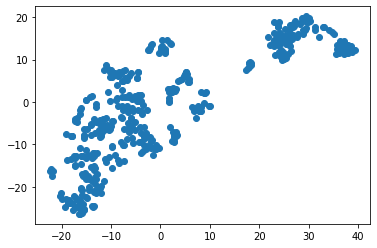

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [9]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
clusters = model.fit_predict(X_train)



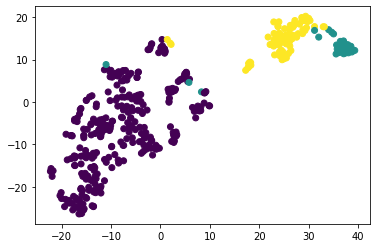

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters)

plt.show()

In [11]:
print(f'среднее значение признака CRIM в кластере 0 = {X_train["CRIM"][clusters == 0].mean()}')
print(f'среднее значение признака CRIM в кластере 1 = {X_train["CRIM"][clusters == 1].mean()}')
print(f'среднее значение признака CRIM в кластере 2 = {X_train["CRIM"][clusters == 2].mean()}')


среднее значение признака CRIM в кластере 0 = 0.40486282828282844
среднее значение признака CRIM в кластере 1 = 14.360380322580648
среднее значение признака CRIM в кластере 2 = 11.745661842105266


In [12]:
print(f'среднее значение признака price в кластере 0 = {y_train["price"][clusters == 0].mean()}')
print(f'среднее значение признака price в кластере 1 = {y_train["price"][clusters == 1].mean()}')
print(f'среднее значение признака price в кластере 2 = {y_train["price"][clusters == 2].mean()}')

среднее значение признака price в кластере 0 = 25.168686868686873
среднее значение признака price в кластере 1 = 13.196774193548386
среднее значение признака price в кластере 2 = 17.4421052631579


#*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [13]:
clusters_test = model.predict(X_test)


In [14]:
print(f'среднее значение признака CRIM в кластере 0 = {X_test["CRIM"][clusters_test == 0].mean()}')
print(f'среднее значение признака CRIM в кластере 1 = {X_test["CRIM"][clusters_test == 1].mean()}')
print(f'среднее значение признака CRIM в кластере 2 = {X_test["CRIM"][clusters_test == 2].mean()}')

среднее значение признака CRIM в кластере 0 = 0.2464211594202899
среднее значение признака CRIM в кластере 1 = 19.021665714285714
среднее значение признака CRIM в кластере 2 = 8.469301923076923


In [15]:
print(f'среднее значение признака price в кластере 0 = {y_test["price"][clusters_test == 0].mean()}')
print(f'среднее значение признака price в кластере 1 = {y_test["price"][clusters_test == 1].mean()}')
print(f'среднее значение признака price в кластере 2 = {y_test["price"][clusters_test == 2].mean()}')

среднее значение признака price в кластере 0 = 23.911594202898552
среднее значение признака price в кластере 1 = 12.814285714285713
среднее значение признака price в кластере 2 = 17.39230769230769


#Дополнительное задание для работы с курсовым проектом:


Примените модель понижения размерности к вашим данным, визуализируйте их.

Сделайте кластеризацию на тренировочном наборе данных. Добавьте новый признак в тренировочный и валидационный наборы данных - метка кластера. Сравнить качество работы модели без метки кластера и с ней по валидационной выборке.

In [87]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive\

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [647]:
df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Lesson1/train.csv')

In [648]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [649]:
ls_median = df['LifeSquare'].median()
df['LifeSquare'].fillna(ls_median, inplace=True)

health1_median = df['Healthcare_1'].median()
df['Healthcare_1'].fillna(health1_median, inplace=True)

In [650]:
df.replace({'Ecology_2': {'A': 1, 'B': 2}}, inplace=True)
df.replace({'Ecology_3': {'A': 1, 'B': 2}}, inplace=True)
df.replace({'Shops_2': {'A': 1, 'B': 2}}, inplace=True)

In [651]:
df.drop('Id', axis=1, inplace=True)

In [652]:
index_rows = df.query('(Rooms == 0) | (Square < 10) | (LifeSquare > 640) | (LifeSquare == 0) | (KitchenSquare <= 3) | (KitchenSquare > 130) | (HouseFloor <= 0)| (HouseFloor > 50) | HouseYear > 2021').index

In [653]:
df.drop(index_rows, axis=0, inplace=True)

In [654]:
y = pd.DataFrame(data=df['Price'])
df.drop('Price', axis=1, inplace=True)

In [639]:
scaler = MinMaxScaler()

In [640]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [641]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.3, random_state=42)

In [610]:
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

(4760, 2)

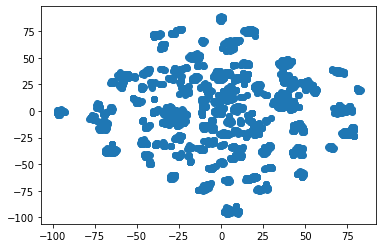

In [611]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

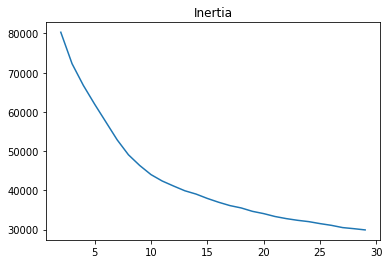

In [422]:
inertias = []

for i in range(2, 30):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(X_train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 30), inertias)

plt.title('Inertia')

plt.show()

In [612]:
cluster_model = KMeans(n_clusters=10, random_state=42, max_iter=200)

In [613]:
clusters = cluster_model.fit_predict(X_train)
clusters_test = cluster_model.predict(X_test)

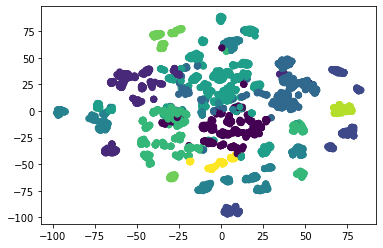

In [614]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters)

plt.show()


In [615]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=45,
                                     random_state=42,  
                                     n_estimators=125)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)
print(r2(y_train, y_train_preds))
print(r2(y_test, y_test_preds))


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8022770972537393
0.6741145869293024


In [656]:
df_scaled['Cluster'] = 0
df_scaled.loc[clusters, 'Cluster'] = clusters
df_scaled.loc[clusters_test, 'Cluster'] = clusters_test



In [657]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     6800 non-null   float64
 1   Rooms          6800 non-null   float64
 2   Square         6800 non-null   float64
 3   LifeSquare     6800 non-null   float64
 4   KitchenSquare  6800 non-null   float64
 5   Floor          6800 non-null   float64
 6   HouseFloor     6800 non-null   float64
 7   HouseYear      6800 non-null   float64
 8   Ecology_1      6800 non-null   float64
 9   Ecology_2      6800 non-null   float64
 10  Ecology_3      6800 non-null   float64
 11  Social_1       6800 non-null   float64
 12  Social_2       6800 non-null   float64
 13  Social_3       6800 non-null   float64
 14  Healthcare_1   6800 non-null   float64
 15  Helthcare_2    6800 non-null   float64
 16  Shops_1        6800 non-null   float64
 17  Shops_2        6800 non-null   float64
 18  Cluster 

In [663]:
df_scaled['Cluster'] = scaler.fit_transform(np.array(df_scaled['Cluster']).reshape(-1,1))

In [666]:
df_scaled.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Cluster
0,0.129187,0.111111,0.161399,0.050184,0.050420,0.073171,0.191489,0.945455,0.144527,1.0,1.0,0.148649,0.154851,0.000000,0.180535,0.000000,0.000000,1.0,0.000000
1,0.105263,0.000000,0.041525,0.035103,0.033613,0.146341,0.148936,0.509091,0.227141,1.0,1.0,0.405405,0.319270,0.007092,0.239261,0.166667,0.000000,1.0,0.111111
2,0.004785,0.111111,0.102916,0.073547,0.050420,0.024390,0.340426,0.709091,0.049072,1.0,1.0,0.445946,0.269257,0.000000,0.043578,0.500000,0.043478,1.0,0.222222
3,0.449761,0.055556,0.080507,0.059255,0.042017,0.365854,0.319149,0.563636,0.541896,1.0,1.0,0.445946,0.449326,0.014184,0.180535,0.000000,0.260870,1.0,0.333333
4,0.473684,0.111111,0.077706,0.072656,0.016807,0.195122,0.170213,0.563636,0.023644,1.0,1.0,0.472973,0.296484,0.007092,0.424984,0.333333,0.173913,1.0,0.444444


In [667]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.3, random_state=42)

In [668]:
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)
print(r2(y_train, y_train_preds))
print(r2(y_test, y_test_preds))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8022770972537393
0.6741145869293024


In [ ]:
X_train.reset_index(inplace=True, drop=True)
y_train = pd.DataFrame(y_train).reset_index(drop=True)

In [433]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances.head(3)

,feature_name,importance
2,Square,0.585782
13,Social_3,0.088097
12,Social_2,0.064037
